In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Loading the data
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [9]:
print(df.dtypes)#shows the Datatypes of the columns 

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [10]:
print(df.shape) #show the number of rows and columns

(200, 4)


In [11]:
print(df.describe(include='all')) #Give The Summary of the Dataset

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [12]:
df.info() #Show The Datatypes And the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.columns #Disply the columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [14]:
#Display the first 5 rows of the dataset
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: >

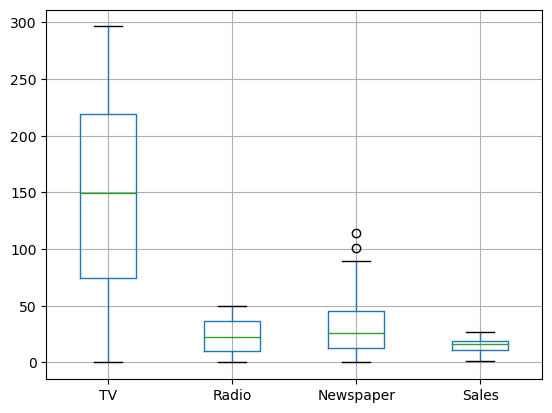

In [15]:
df.boxplot() #boxplot to find outliers

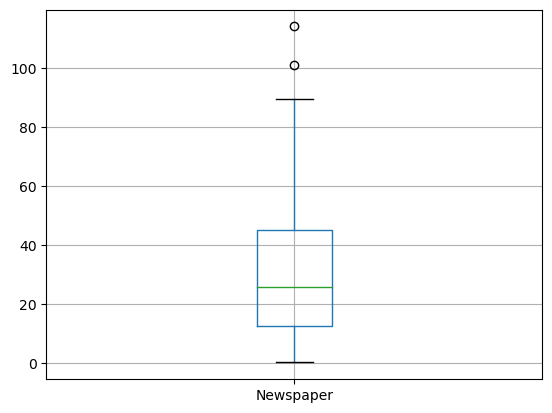

In [16]:
df.boxplot(column="Newspaper") #will show a specific columns
plt.show()

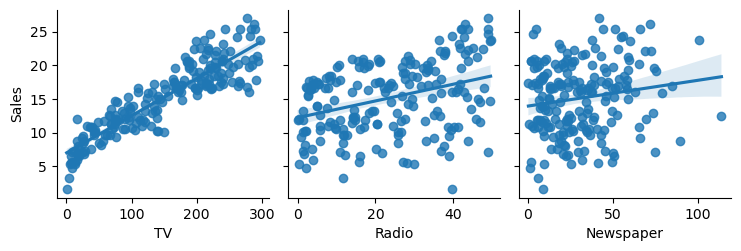

In [17]:
sns.pairplot(df,
             x_vars=["TV","Radio","Newspaper"],
             y_vars="Sales",
             kind='reg')
plt.show()

In [18]:
#To Check missing values by using condition 
if df.isnull().any().any():
    print("There is a missing value in the data Frame")
else:
    print("There is not missing value in the dataFrame")

There is not missing value in the dataFrame


In [19]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [20]:
#checking missing value
def check_missing_value(data):
    """
    Objective: Check missing value count and percentage in all columns
    
    data: input data frame 
    return: Missing value data frame 

    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

In [21]:
miss = check_missing_value(df)
miss

,Total,Percent
TV,0,0.0
Radio,0,0.0
Newspaper,0,0.0
Sales,0,0.0


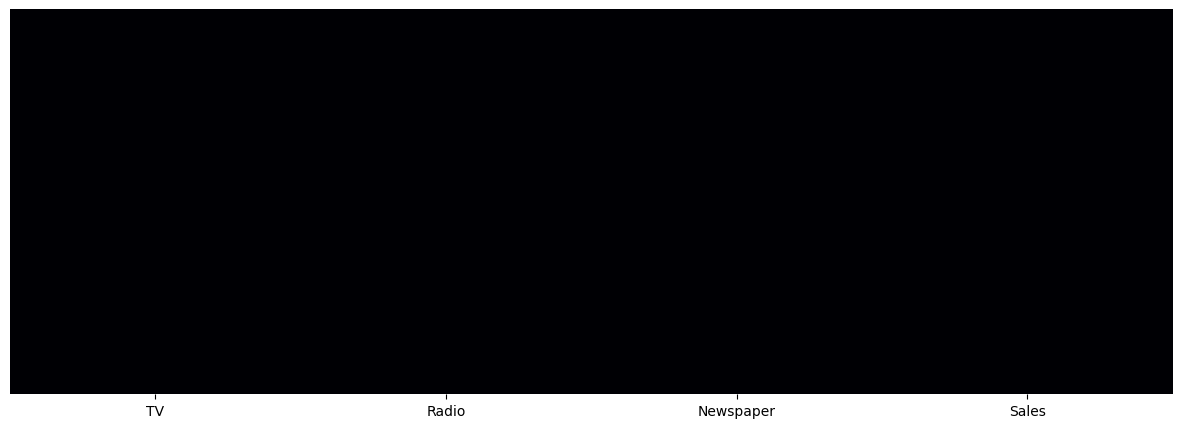

In [25]:
#plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar = False, yticklabels=False, cmap="magma" )
plt.show()

In [26]:
#split the data into independent variables (X) and the dependent variable (y)
X = df[['TV','Radio','Newspaper']]
Y = df['Sales']

In [27]:
X #Independent Variables 

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [28]:
Y #Dependent Variable

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [29]:
#split the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,  Y, test_size=0.2,random_state=32)  

In [30]:
#Initialize the Linear Model
model = LinearRegression()

In [31]:
#Train the model on the training data
model.fit(X_train,Y_train)

LinearRegression()

In [32]:
X_train

,TV,Radio,Newspaper
156,93.9,43.5,50.5
154,187.8,21.1,9.5
153,171.3,39.7,37.7
197,177.0,9.3,6.4
185,205.0,45.1,19.6
...,...,...,...
190,39.5,41.1,5.8
124,229.5,32.3,74.2
54,262.7,28.8,15.9
133,219.8,33.5,45.1


In [33]:
#Predict the sales on the testing data
y_predit =  model.predict(X_test)
print(y_predit)

[17.01235719 12.4216622  16.3972177  24.63665759 10.25910504 10.43234456
 11.50405105 21.10882024  8.10187182  8.33915041 19.47519592 17.04267593
 21.16954147 18.85976458 10.71175695 14.54887632  9.58015987 24.23668802
 21.45612553 15.53464089 15.6642278  10.60780505 18.02953404 15.98724401
  8.89508371 10.94019483  8.20757737 21.64784046 11.78728393 12.27754992
 12.6510029  10.70674788 20.89512035 19.26300506 15.72281153 19.02941714
 12.62044365 17.0403809   9.16823402 10.00183657]


In [34]:
#prediction vales
# try changing the value of X 
X1=300 # tv
X2=200 # radio
X3=0 # newspaper
y_pred_single_data=3.5963760844147785+(12.78240791 *X1)+(9.5053313 *X2)+(-0.19952401*X3)
print(y_pred_single_data)

5739.385009084415


In [35]:
#Will Disply A New DataFrame
new_df = pd.DataFrame()
new_df = X_test

new_df["Actual Sales"] = Y_test #New Actual Sales  Columns
new_df["Predicted Sales"] = y_predit #New Predicted Sales  Columns
new_df

,TV,Radio,Newspaper,Actual Sales,Predicted Sales
122,224.0,2.4,15.6,16.6,17.012357
186,139.5,2.1,26.6,10.3,12.421662
167,206.8,5.2,19.4,17.2,16.397218
101,296.4,36.3,100.9,23.8,24.636658
29,70.6,16.0,40.8,10.5,10.259105
75,16.9,43.7,89.4,8.7,10.432345
144,96.2,14.8,38.9,12.3,11.504051
28,248.8,27.1,22.9,18.9,21.108820
121,18.8,21.7,50.4,7.0,8.101872
182,56.2,5.7,29.7,8.7,8.339150


In [36]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(Y_test,y_predit)
print("R Square: ", r2)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(Y_test,y_predit))
print("RMSE: ", rmse)

R Square:  0.8912523008744868
Adjusted R Square:  0.8895877952756269
RMSE:  1.6884130691652037


In [37]:
print(min(Y))
print(max(Y))      

1.6
27.0


In [38]:
#Convert The Output Into New Datafame 
new_df["Deviation"] = new_df["Actual Sales"] - new_df["Predicted Sales"]
new_df.to_csv("Advertising_Pred.csv", header=True, index=False) #Save The DataFame Into CSV File

In [39]:
new_df.head() #Will Disply the First 5 Rews Of The DataFrame

,TV,Radio,Newspaper,Actual Sales,Predicted Sales,Deviation
122,224.0,2.4,15.6,16.6,17.012357,-0.412357
186,139.5,2.1,26.6,10.3,12.421662,-2.121662
167,206.8,5.2,19.4,17.2,16.397218,0.802782
101,296.4,36.3,100.9,23.8,24.636658,-0.836658
29,70.6,16.0,40.8,10.5,10.259105,0.240895


In [40]:
#Load The New DataSet
df = pd.read_csv("Advertising_Pred.csv")
df 

,TV,Radio,Newspaper,Actual Sales,Predicted Sales,Deviation
0,224.0,2.4,15.6,16.6,17.012357,-0.412357
1,139.5,2.1,26.6,10.3,12.421662,-2.121662
2,206.8,5.2,19.4,17.2,16.397218,0.802782
3,296.4,36.3,100.9,23.8,24.636658,-0.836658
4,70.6,16.0,40.8,10.5,10.259105,0.240895
5,16.9,43.7,89.4,8.7,10.432345,-1.732345
6,96.2,14.8,38.9,12.3,11.504051,0.795949
7,248.8,27.1,22.9,18.9,21.108820,-2.208820
8,18.8,21.7,50.4,7.0,8.101872,-1.101872
9,56.2,5.7,29.7,8.7,8.339150,0.360850
